# Objectives
- Describe when clustering is the appropriate analysis technique
- Use scikit-learn to perform k-means clustering

# 1. Gather and Prepare Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('Data/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# 2. Choose Model
Ploting the Relation between Age , Annual Income and Spending Score

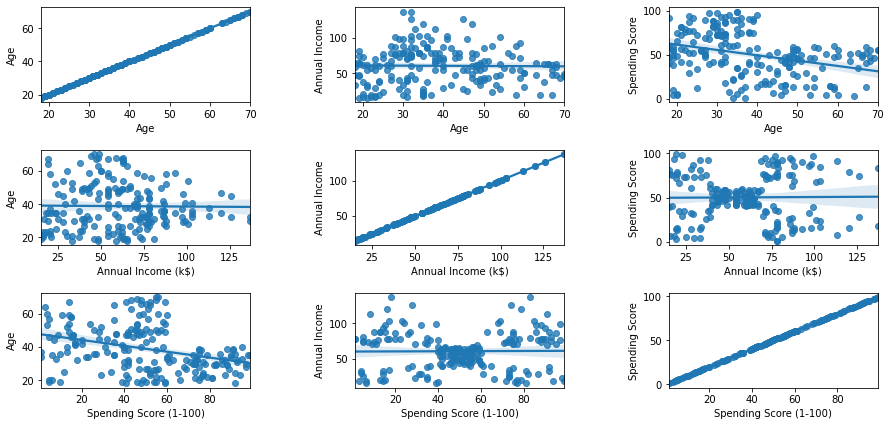

In [12]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

In [14]:
X = df.iloc[:,2:]
X

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [20]:
# Create an empty list
wcss = []

# Create all possible cluster solutions for k = 1 to 7 and save inertia to a list
for k in range(1,10):
    # Cluster solution with i clusters
    kmeans = KMeans(k)
    
    # Fit the data
    kmeans.fit(X)
    
    # Find WCSS for the current iteration
    wcss_iter = kmeans.inertia_
    
    # Append the value to the WCSS list
    wcss.append(wcss_iter)

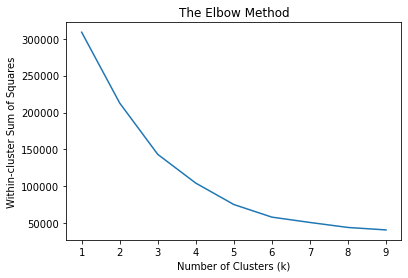

In [21]:
# Create a variable containing the numbers from 1 to 6, so we can use it as X axis of the future plot
number_clusters = range(1,10)
# Plot the number of clusters vs WCSS
plt.plot(number_clusters,wcss)
# Name your graph
plt.title('The Elbow Method')
# Name the x-axis
plt.xlabel('Number of Clusters (k)')
# Name the y-axis
plt.ylabel('Within-cluster Sum of Squares')
plt.show()

# 3. Train Model (k=5)

In [43]:
kmeans5 = KMeans(5)
kmeans5.fit(X)

KMeans(n_clusters=5)

# 4. Evaluate Model

In [44]:
# Create a variable which will contain the predicted clusters for each observation
identified_clusters = kmeans5.fit_predict(X)
# Check the result
identified_clusters

array([0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 4, 3, 1, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3])

In [45]:
# Create a copy of the mapped data
data_with_clusters = df.copy()

# Create a new Series, containing the identified cluster for each observation
data_with_clusters['Cluster'] = identified_clusters

# Check the result
data_with_clusters

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,2
2,3,Female,20,16,6,0
3,4,Female,23,16,77,2
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,4
197,198,Male,32,126,74,3
198,199,Male,32,137,18,4


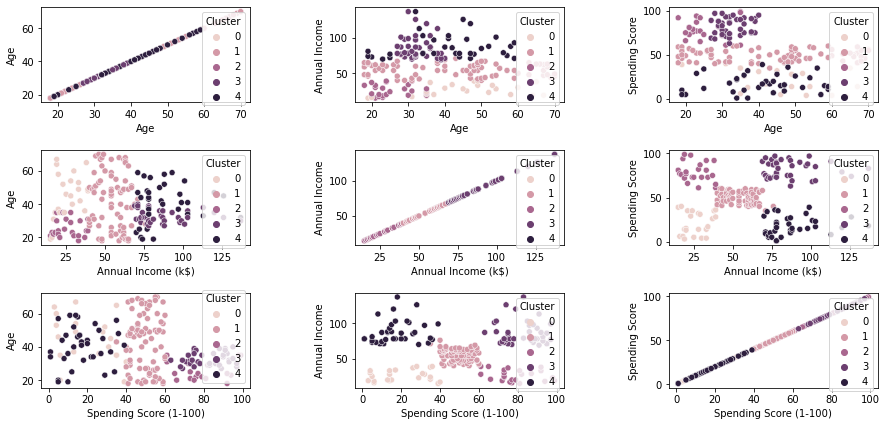

In [46]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.scatterplot(x = x , y = y , data = data_with_clusters, hue='Cluster')
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

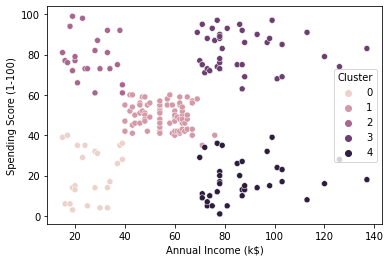

In [47]:
sns.scatterplot(x=data_with_clusters['Annual Income (k$)'], y=data_with_clusters['Spending Score (1-100)'], hue=data_with_clusters['Cluster'])

In [48]:
X

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [49]:
from sklearn import preprocessing

In [50]:
preprocessing.scale(X)

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590